# Task 1

### a & b

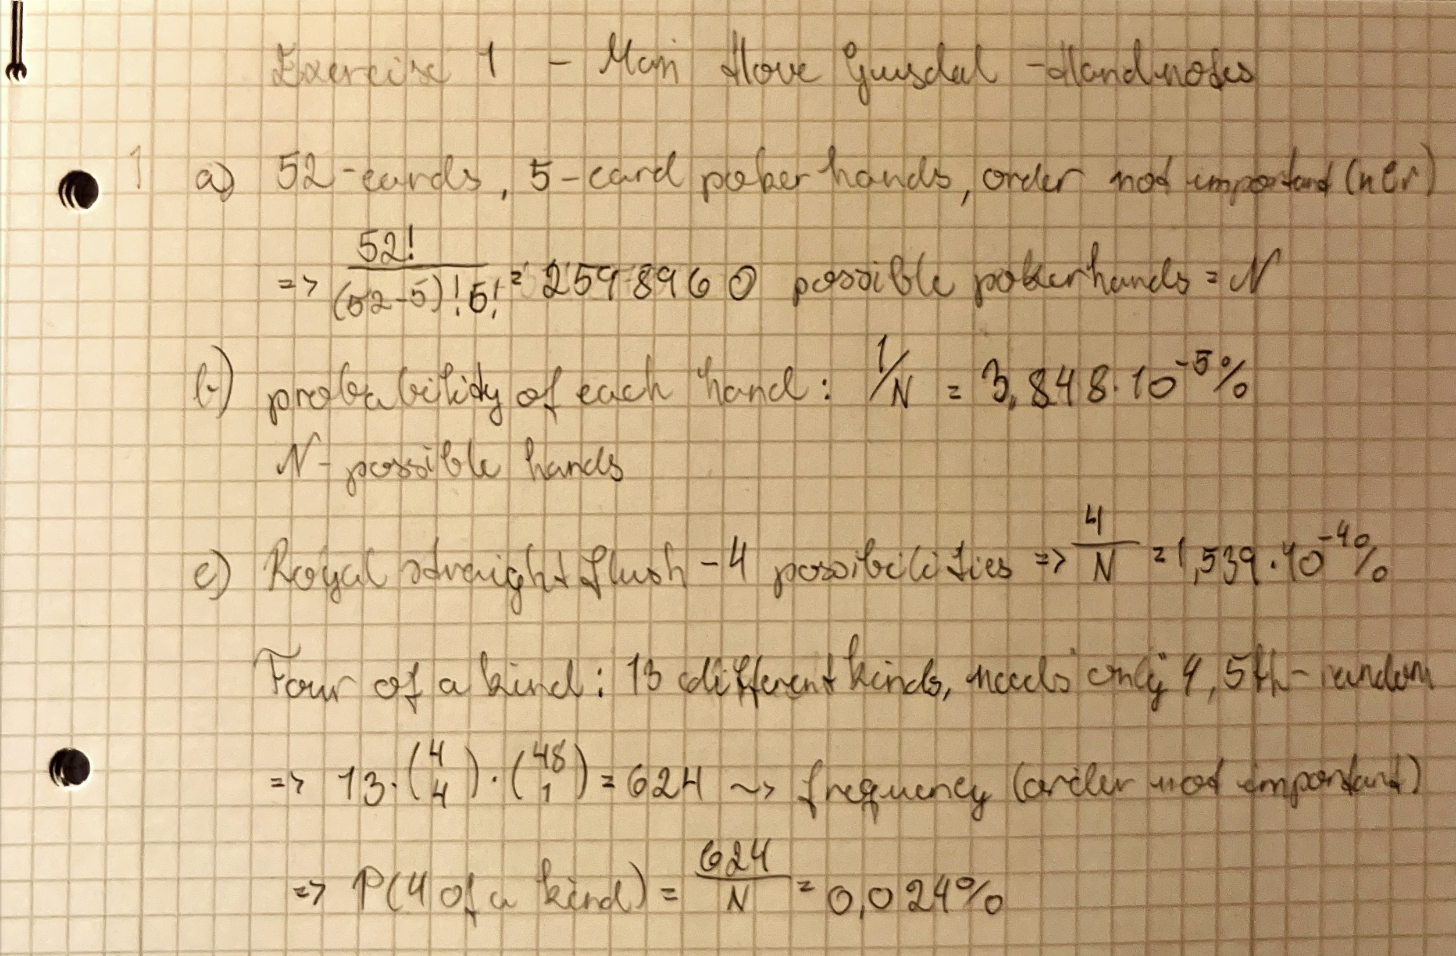

# Task 2

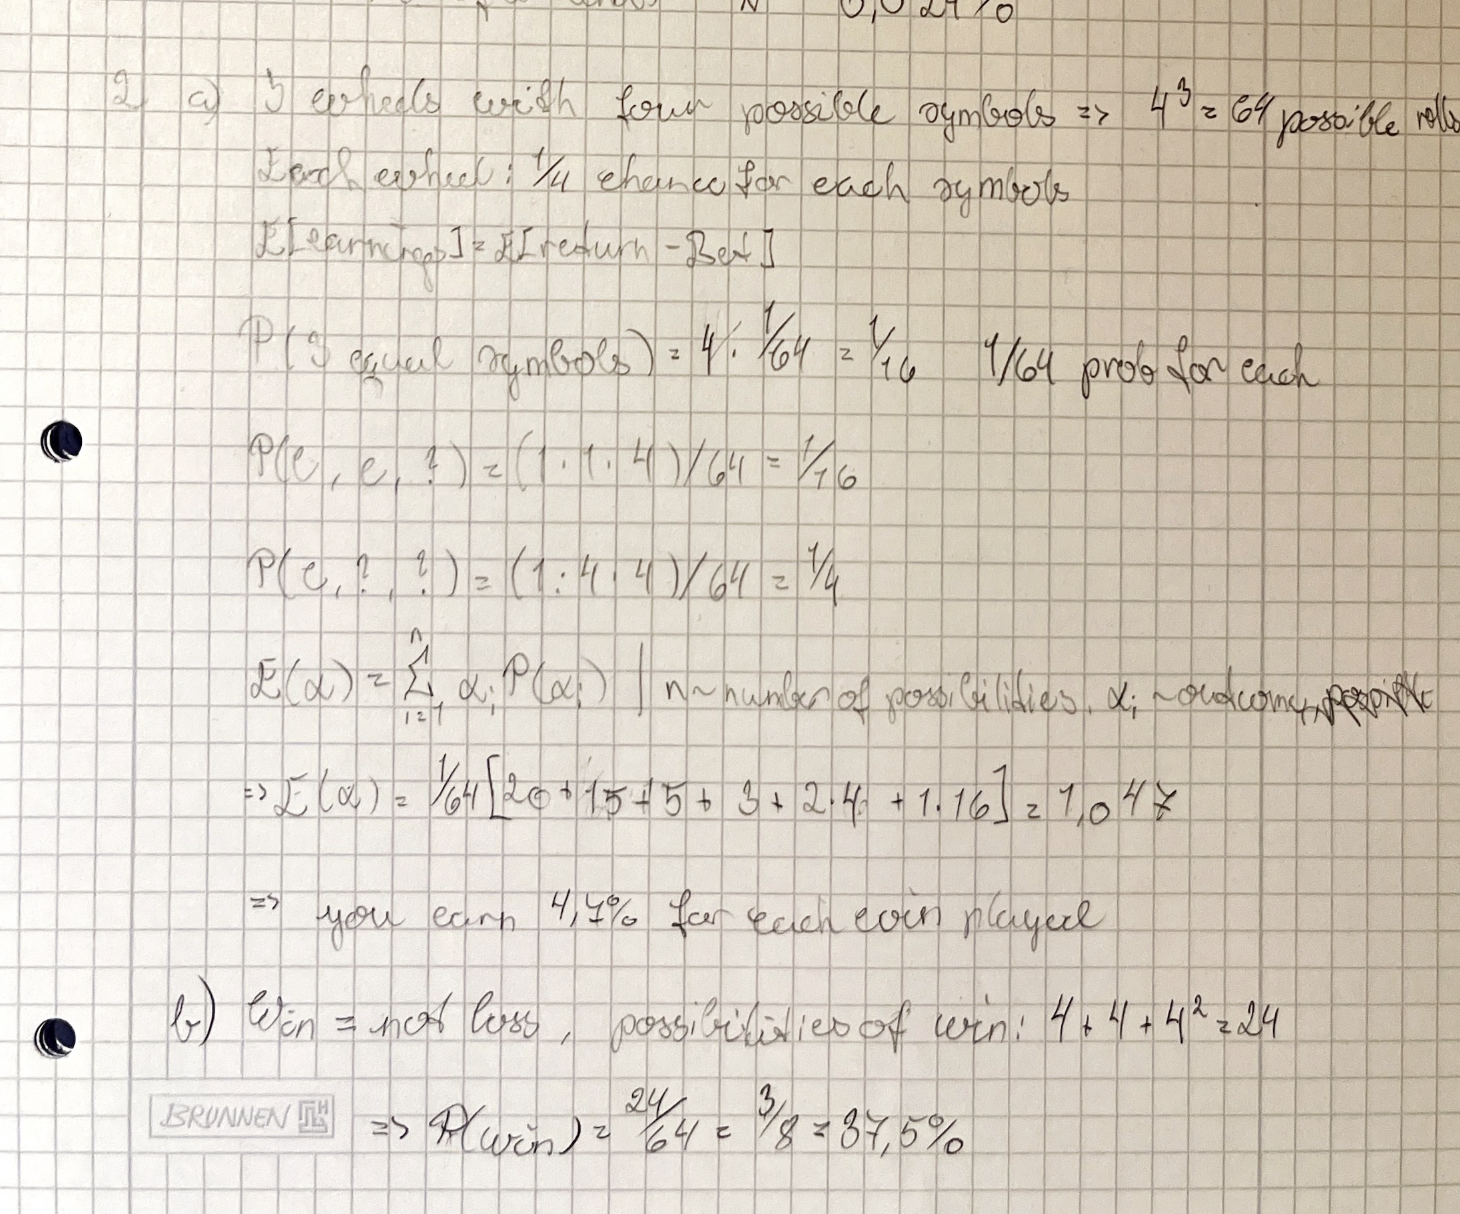

The mean number of plays is 9455.1503
The median number of plays is 30.0


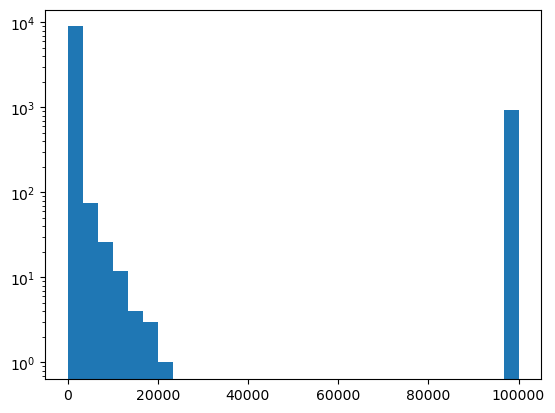

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random

n_coins = 10

probabilities = [1/64, 1/64, 1/64, 1/64, 4/64, 16/64, 0.625]
rewards = [20, 15, 5, 3, 2, 1, 0]

def simulation(prob, rew, start_coins, max_plays):
    coins = start_coins
    plays = 0
    while coins > 0 and plays < max_plays:
        coins -= 1
        plays += 1

        reward = random.choices(rew, prob)[0]
        coins += reward
    return plays

trials = 10000
results = [simulation(probabilities, rewards, n_coins, 100000) for _ in range(trials)]

mean = np.mean(results)
median = np.median(results)

print(f'The mean number of plays is {mean}')
print(f'The median number of plays is {median}')


plt.hist(results, bins=30, log=True)
plt.show()


    



I ended up usisn a maximum number of plays to 100 000 plays, as to decrease compilation times. I also added a logarithmic scale as to better visualize the spreading. From the results we notice a drasticly different result in the median and mean values. This, along with the histogram plot shows us that the majority of all plays end after around 30 plays, however we can also see that quite a few only end after reaching the maximum number of plays. In reality these would likely spread out, with very few ending up with the exact same number of plays, but the forced cut-off causes them to end up in a larger bunch. 

### Task 3

*Part 1*

P(same birthday) = 1 - P(unique birthdays)

The portion of the groups where the probabilty of same birthdate is above 50% is 67.5%
The smallest possible groupsize where the probability of same birdate is greater than 50% is 23


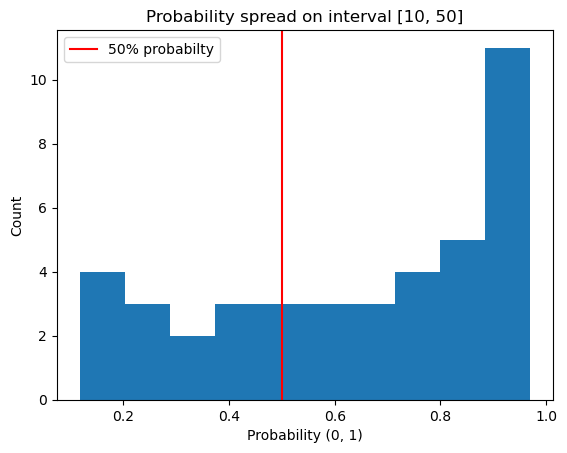

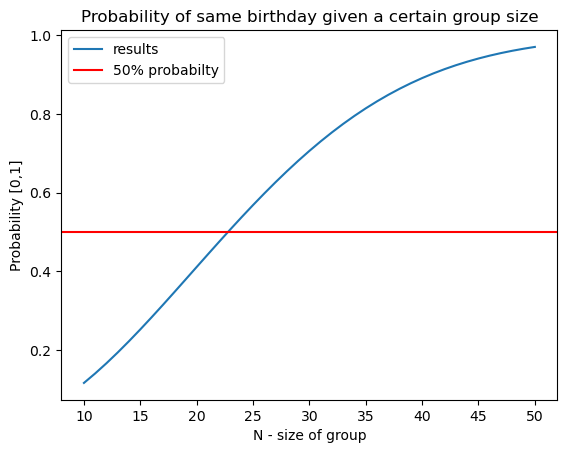

In [49]:
def sameBirthdayProb(n):
    if n>365:
        return 1
    prob_unique = 1.0
    for i in range(n):
        prob_unique *= (365 - i)/365
    return 1 - prob_unique

interval_results = [sameBirthdayProb(_) for _ in range(10,51)]
array_res = np.array(interval_results)
smallest_possible_group = np.where(array_res >= 0.5)[0][0]
portion_prob = (40 - smallest_possible_group)/40
print(f'The portion of the groups where the probabilty of same birthdate is above 50% is {round(100*portion_prob, 3)}%')
print(f'The smallest possible groupsize where the probability of same birdate is greater than 50% is {smallest_possible_group+10}')

plt.hist(interval_results)
plt.title("Probability spread on interval [10, 50]")
plt.xlabel("Probability (0, 1)")
plt.ylabel("Count")
plt.axvline(0.5, color='r', label="50% probabilty")
plt.legend()
plt.show()

plt.plot(range(10, 51), interval_results, label="results")
plt.axhline(0.5, color='r', label="50% probabilty")
plt.xlabel("N - size of group")
plt.ylabel("Probability [0,1]")
plt.title("Probability of same birthday given a certain group size")
plt.legend()
plt.show()

*Part 2*

The mean groupsize is 2365.0
The median groupsize is 2289.0


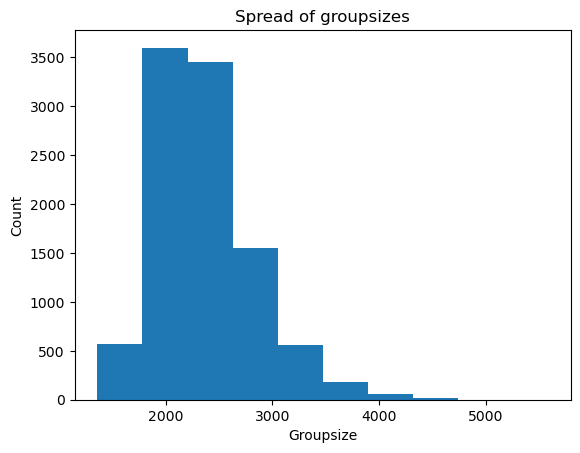

In [59]:
import random

def groupWithBirthdays():
    groupSize = 0
    unique_birthdays = set()

    while len(unique_birthdays) < 365:
        new_birthday = random.randint(1, 365)
        unique_birthdays.add(new_birthday)
        groupSize += 1
    
    return groupSize

trials = 10000
group_results = [groupWithBirthdays() for _ in range(trials)]

mean_group = np.mean(group_results)
median_group = np.median(group_results)

print(f'The mean groupsize is {round(mean_group, 0)}')
print(f'The median groupsize is {median_group}')

plt.hist(group_results)
plt.ylabel("Count")
plt.xlabel("Groupsize")
plt.title("Spread of groupsizes")
plt.show()